## 绘图

- Pandas提供如下几种可视化图形：
    - `DataFrame.plot([x, y, kind, ax, ….])	`
        - 所有图形，使用kind指定图形类别，默认是线段图
    - `DataFrame.plot.area([x, y])	`
	    - 区域图
    - `DataFrame.plot.bar([x, y])	`
	    - 条状图
    - `DataFrame.plot.barh([x, y])`	
	    - 水平条状图
    - `DataFrame.plot.box([by])	`
	    - 方框图
    - `DataFrame.boxplot([column, by, ax, …])	`
	    - 使用列绘制的方框图

    - `DataFrame.plot.density([bw_method, ind])	`
	    - 使用高斯核产生密度估计图
    - `DataFrame.plot.hexbin(x, y[, C, …])	`
	    - 六边形图
    - `DataFrame.plot.hist([by, bins])	`
	    - 直方图
    - `DataFrame.hist([column, by, grid, …])`
	    - 数据集直方图

    - `DataFrame.plot.kde([bw_method, ind])	`
	    - 使用高斯核生成核密度估计图（曲线）。
    - `DataFrame.plot.line([x, y])`	
	    - 线段图
    - `DataFrame.plot.pie([y])	`
	    - 饼图
    - `DataFrame.plot.scatter(x, y[, s, c])	`
	    - 散点图



### plot图形的属性

```python
    DataFrame.plot(
        x=None, 
        y=None, 
        kind='line', 
        ax=None, 
        subplots=False, 
        sharex=None, 
        sharey=False, 
        layout=None, 
        figsize=None, 
        use_index=True, 
        title=None, 
        grid=None, 
        legend=True, 
        style=None, 
        logx=False, 
        logy=False, 
        loglog=False, 
        xticks=None, 
        yticks=None, 
        xlim=None, 
        ylim=None, 
        rot=None, 
        fontsize=None, 
        colormap=None, 
        table=False, 
        yerr=None, 
        xerr=None, 
        secondary_y=False, 
        sort_columns=False, 
        **kwds)    # matplotlib中plot函数支持的其他属性
```

1. 默认绘制情况

            job_company
job_listed             
A轮                   49
B轮                   31
C轮                   33
D轮及以上                41
不需要融资                47
天使轮                  14
已上市                  51
未融资                  19


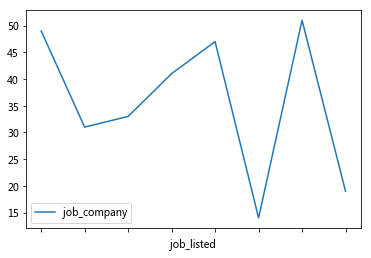

In [367]:
% matplotlib inline
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()
print(df)
df.plot()

2. 使用下x，y指定可视化数据
    - 默认x使用索引，如果想使用列作为x轴，可以使用x指定列
    - 默认y使用所有的列，如果想使用指定的列，可以使用y指定

            job_company job_listed  百分比
job_listed                             
A轮                   49         A轮   50
B轮                   31         B轮   40
C轮                   33         C轮   80
D轮及以上                41      D轮及以上   60
不需要融资                47      不需要融资   10
天使轮                  14        天使轮   20
已上市                  51        已上市   70
未融资                  19        未融资   30


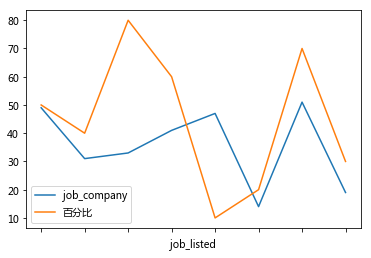

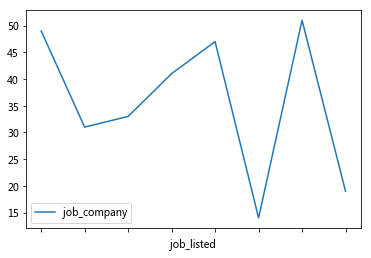

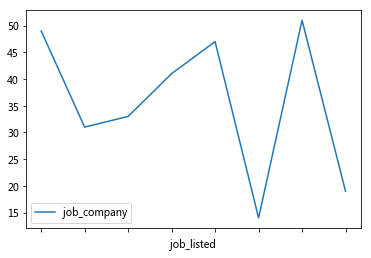

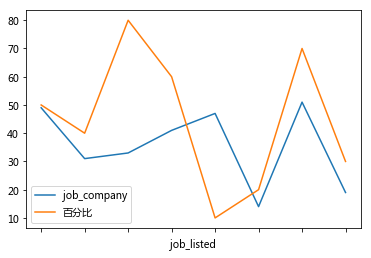

In [385]:
% matplotlib inline
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df)
df.plot(x=1)
df.plot(x='job_listed', y='job_company')   # 使用列名
df.plot(x=1, y=0)    # 使用位置

df.plot(x=1, y=[0,2])    # 使用位置指定两列

3. 使用ax设置坐标轴属性
    - 默认的axes都是采用默认属性，可以使用ax属性绑定一个定制的ax；

Text(0.5, 0, '上市类别')

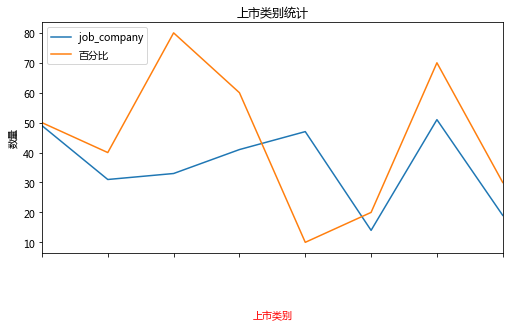

In [403]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]

figure = plt.figure(0, figsize=(8,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(0, 7)
ax.set_title('上市类别统计')
ax.set_xlabel('上市类别',  labelpad=50)   # 这个标签在调用plot被改变了
ax.set_ylabel('数量')
df.plot(ax = ax)
ax.set_xlabel('上市类别',  labelpad=50, fontdict= {
    'color': (1,0,0,1),
    'fontsize': 10,
    'fontweight' : 900})   # 再改回来     (字体属性，可以参考matplotlib.text.Text帮助文档)

4. 使用subplots单独显示每一列的数据
     - 当有多列的时候，可以使用这个属性分开显示
     - 使用sharex,sharey共享x，y轴的属性

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c808e48>,
      dtype=object)

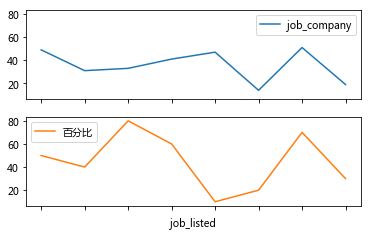

In [407]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]

df.plot(subplots=True,sharex=True, sharey=True)


5. 使用layout指定坐标系行列布局
    - 为了控制每个坐标系的位置，可以使用lauout指定多个坐标系的布局，每行每列多少个坐标系。
    - 还可以使用figsize指定图的大小。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d27c518>,
      dtype=object)

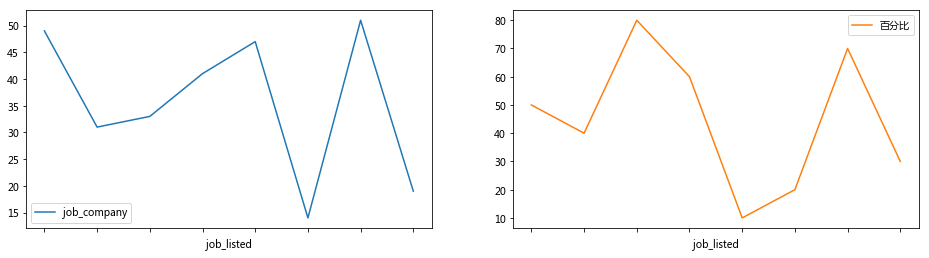

In [414]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]

df.plot(subplots=True,sharex=False, sharey=False,layout=(1,2),figsize=(16, 4))



6. 使用title与legend显示主题
    - 默认legend是显示的，如果不想显示，可以设置为False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d87eeb8>,
      dtype=object)

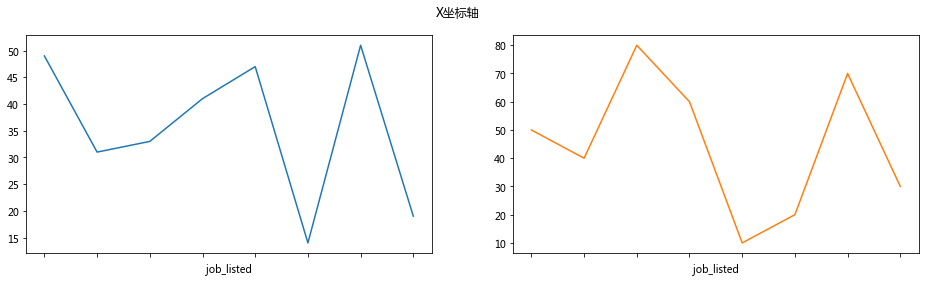

In [416]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]

df.plot(subplots=True,sharex=False, sharey=False,layout=(1,2),figsize=(16, 4), legend=False, title='坐标系标题')




7. 设置use_index使用索引作为x坐标
    - 可以不使用索引作为坐标轴，默认使用索引作为坐标轴。

            job_company job_listed  百分比
job_listed                             
A轮                   49         A轮   50
B轮                   31         B轮   40
C轮                   33         C轮   80
D轮及以上                41      D轮及以上   60
不需要融资                47      不需要融资   10
天使轮                  14        天使轮   20
已上市                  51        已上市   70
未融资                  19        未融资   30


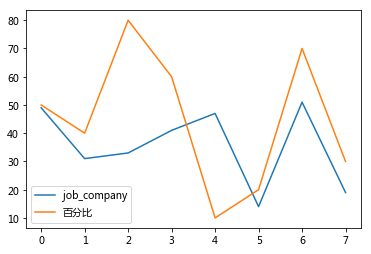

In [421]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df)
df.plot(use_index=False)   # 不使用索引作为坐标轴。自动生成x坐标轴。



8. 使用xticks与yticks设置坐标刻度的样式
    - 可以使用xticks与yticks设置刻度标签；
    

['A轮' 'B轮' 'C轮' 'D轮及以上' '不需要融资' '天使轮' '已上市' '未融资']


(0, 90)

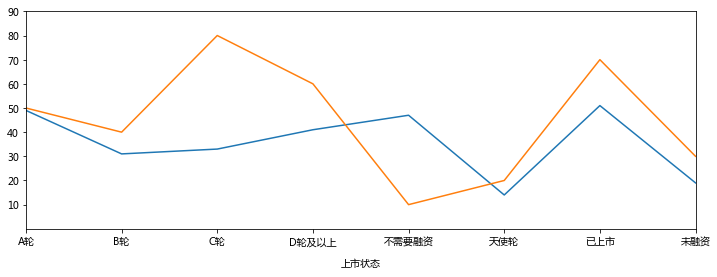

In [458]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df.index.values)
ax = df.plot(xticks=[0,1,2,3,4,5,6,7] ,yticks=[10,20,30,40,50,60,70,80,90] ,figsize=(12,4), legend=False)   # 不使用索引作为坐标轴。自动生成x坐标轴。

ax.set_xlabel('上市状态', labelpad=10)
ax.set_xlim(0,7)
ax.set_ylim(0,90)

9. 使用style设置每列的线条样式
    - style是字典或者列表。
    - 字典使用列名映射，否则就是对应位置

    - 注意
        - 可以使用Line2D中其他样式。比如linewidth或者marker

['A轮' 'B轮' 'C轮' 'D轮及以上' '不需要融资' '天使轮' '已上市' '未融资']


(0, 90)

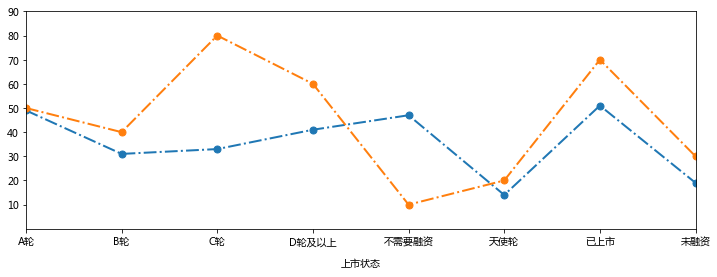

In [457]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df.index.values)
ax = df.plot(xticks=[0,1,2,3,4,5,6,7] ,yticks=[10,20,30,40,50,60,70,80,90] ,figsize=(12,4), legend=False, style='-.', linewidth=2, marker='o', markersize=7)   

ax.set_xlabel('上市状态', labelpad=10)
ax.set_xlim(0,7)
ax.set_ylim(0,90)

10. 使用colormap设置颜色列表
    - 使用colormap可以指定颜色列表。当然可以选择已有的颜色方案。

['A轮' 'B轮' 'C轮' 'D轮及以上' '不需要融资' '天使轮' '已上市' '未融资']


(0, 90)

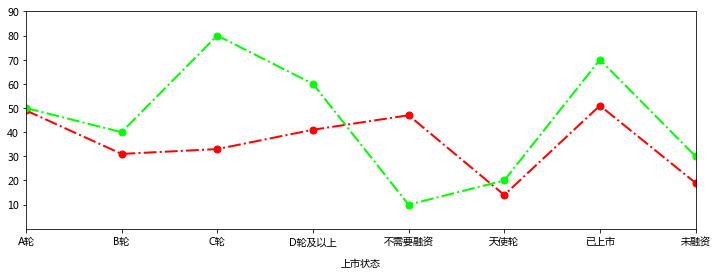

In [459]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df.index.values)
ax = df.plot(
    xticks=[0,1,2,3,4,5,6,7] ,
    yticks=[10,20,30,40,50,60,70,80,90] ,
    figsize=(12,4), 
    legend=False, 
    style='-.', linewidth=2, marker='o', markersize=7,
    colormap=ListedColormap([[1,0,0,1], [0,1,0,1]])
)   

ax.set_xlabel('上市状态', labelpad=10)
ax.set_xlim(0,7)
ax.set_ylim(0,90)

11. 使用xlim与ylim设置坐标范围与方向
    - 这个与Axes的set_xlim与set_ylim一样作用。

['A轮' 'B轮' 'C轮' 'D轮及以上' '不需要融资' '天使轮' '已上市' '未融资']


Text(0.5, 0, '上市状态')

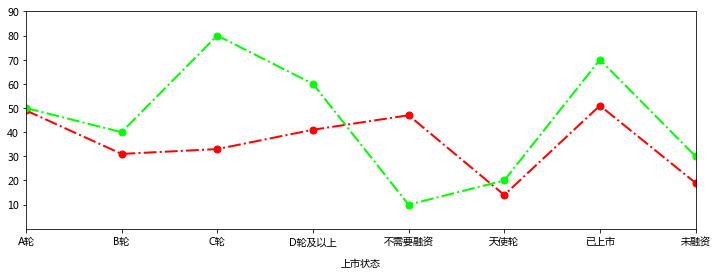

In [460]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df.index.values)
ax = df.plot(
    xticks=[0,1,2,3,4,5,6,7] ,
    yticks=[10,20,30,40,50,60,70,80,90] ,
    figsize=(12,4), 
    legend=False, 
    style='-.', linewidth=2, marker='o', markersize=7,
    colormap=ListedColormap([[1,0,0,1], [0,1,0,1]]),
    xlim=(0, 7),
    ylim=(0, 90)
)   

ax.set_xlabel('上市状态', labelpad=10)


12. 使用rot空值坐标刻度的旋转角度 
    - 旋转x坐标的刻度标签

['A轮' 'B轮' 'C轮' 'D轮及以上' '不需要融资' '天使轮' '已上市' '未融资']


Text(0.5, 0, '上市状态')

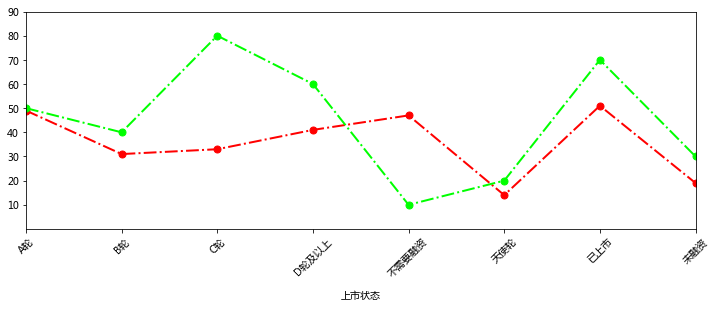

In [461]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df.index.values)
ax = df.plot(
    xticks=[0,1,2,3,4,5,6,7] ,
    yticks=[10,20,30,40,50,60,70,80,90] ,
    figsize=(12,4), 
    legend=False, 
    style='-.', linewidth=2, marker='o', markersize=7,
    colormap=ListedColormap([[1,0,0,1], [0,1,0,1]]),
    xlim=(0, 7),
    ylim=(0, 90),
    rot = 45
)   

ax.set_xlabel('上市状态', labelpad=10)



13. 使用fontsize设置坐标刻度的字体
    fontsize= 设置刻度的字体大小

['A轮' 'B轮' 'C轮' 'D轮及以上' '不需要融资' '天使轮' '已上市' '未融资']


Text(0.5, 0, '上市状态')

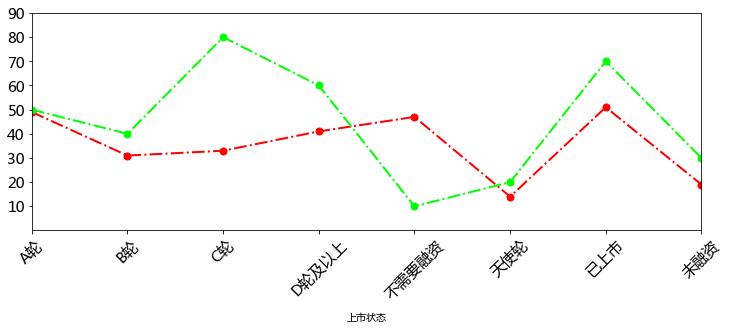

In [465]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df.index.values)
ax = df.plot(
    xticks=[0,1,2,3,4,5,6,7] ,
    yticks=[10,20,30,40,50,60,70,80,90] ,
    figsize=(12,4), 
    legend=False, 
    style='-.', linewidth=2, marker='o', markersize=7,
    colormap=ListedColormap([[1,0,0,1], [0,1,0,1]]),
    xlim=(0, 7),
    ylim=(0, 90),
    rot = 45,
    fontsize=15
)   

ax.set_xlabel('上市状态', labelpad=10)




14. 使用logx，logy，loglog设置坐标的刻度为指数
    - 几个属性是对某些值不均等，但指数均等的情况有意义。比如：0.1, 0.01, 0.001，可以采用其指数作为坐标刻度-1，-2，-3。
    - loglog同时设置x，y坐标。

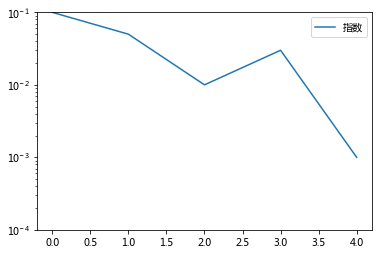

In [476]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        '指数': [0.1, 0.05, 0.01, 0.03,0.001]
    }
)

df.plot(logy=True, ylim=(0.0001, 0.1))   



15. 设置table属性显示数据为表格
    - table属性的数据类型：boolean, Series or DataFrame, default False
    - 用来绘制一个表格，如果是boolean指，则绘制当前图像数据

['A轮' 'B轮' 'C轮' 'D轮及以上' '不需要融资' '天使轮' '已上市' '未融资']


Text(0.5, 0, '上市状态')

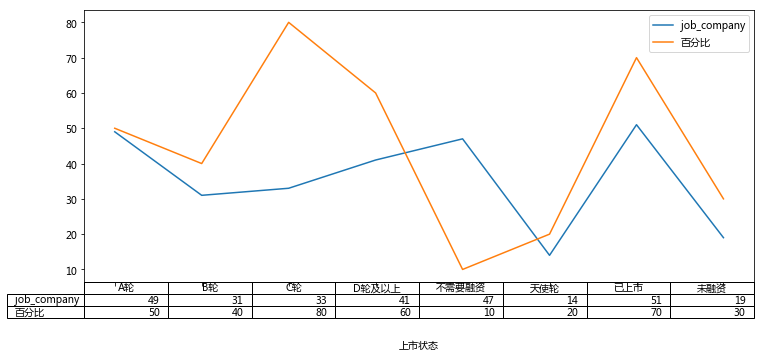

In [481]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
print(df.index.values)
ax = df.plot(table=True,figsize=(12,5),)   


ax.set_xlabel('上市状态', labelpad=50)



Text(0.5, 0, '上市状态')

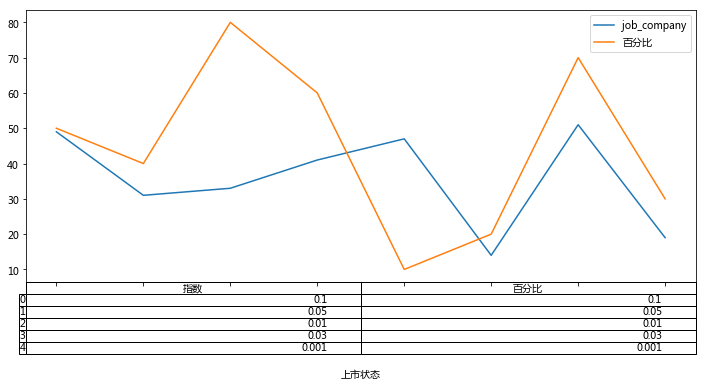

In [483]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]

table_data = pd.DataFrame(
    {
        '指数': [0.1, 0.05, 0.01, 0.03,0.001],
        '百分比': [0.1, 0.05, 0.01, 0.03,0.001]
    }
)



ax = df.plot(figsize=(12,5), table=table_data)   


ax.set_xlabel('上市状态', labelpad=80)




16. 使用stacked控制多个数据是否重叠还是并列显示
    - 用在直方图，bar图，区域图比较合适。用在曲线图比较抽象

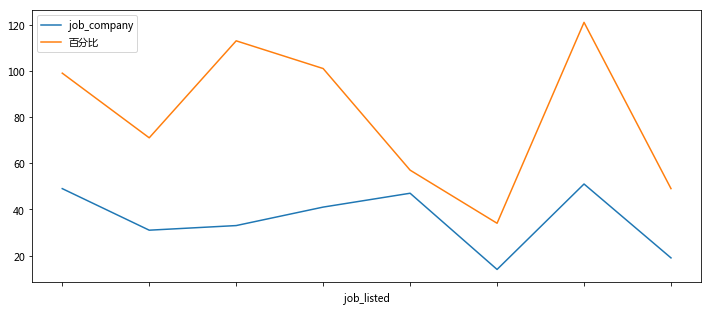

In [485]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]


ax = df.plot(figsize=(12,5), stacked=True)     # 累加


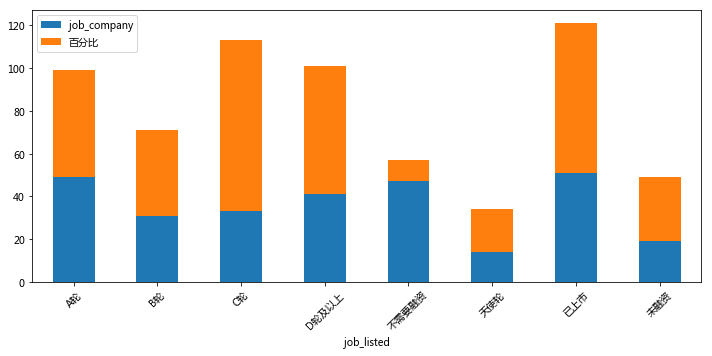

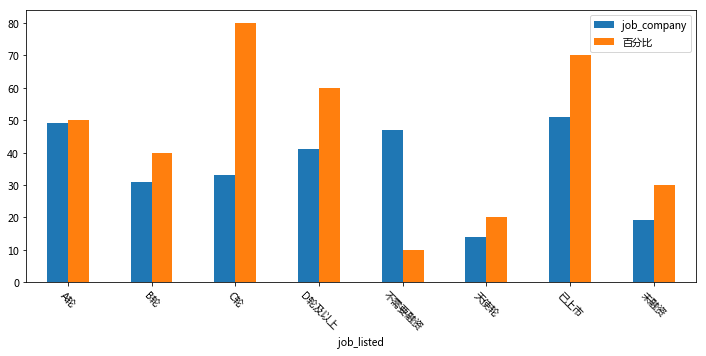

In [489]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]


ax = df.plot(kind='bar',figsize=(12,5), stacked=True,rot=45)     # True

ax = df.plot(kind='bar',figsize=(12,5), stacked=False, rot=-45)     # False

### 常见图形绘制例子

#### area图

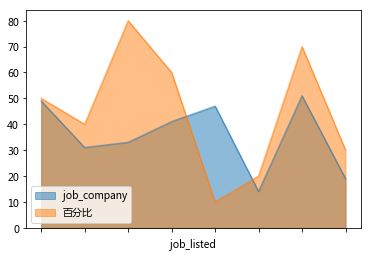

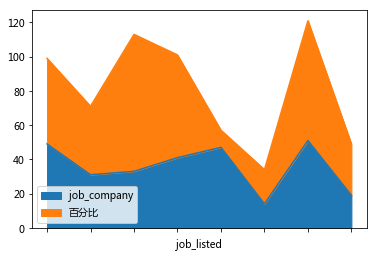

In [509]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]


ax = df.plot.area(stacked=False)
ax = df.plot.area(stacked=True)  # 默认是True

#### bar图

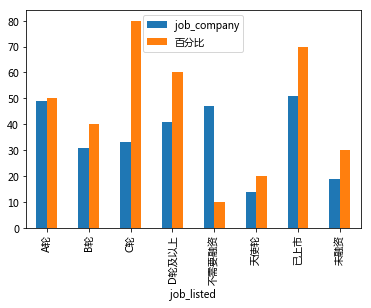

In [513]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]


ax = df.plot.bar(stacked=False)

#### barh图

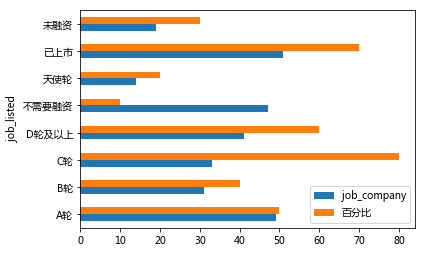

In [511]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
ax = df.plot.barh(stacked=False)

#### box图

- 线图是一种通过四分位数以图形方式描述数字数据组的方法。
- box图说明如下：
    - 

1. 四分位概念
    - 第一四分位：Q3（上四分位）
    - 第二四分位：Q2（中位数）
    - 第三四分位：Q1（下四分位）

2. 四分位说明：
    - 四分位就是把样本按照样本数分成4等分（100%，75%，50%，25%，0%）
        - 位置在**75%**处的样本值为上四分位数。
        - 位置在**50%**处的样本值为中位数。
        - 位置在**25%**处的样本值为下四分位数。
    
    - 问题：
        - 就是**75%**处没有数字怎么办？下面就解释四分位数的计算规则

3. 四分位数的计算规则（规则一：整除的情况）
    - 假设数据样本是：` data = [1, 1, 9, 1, 3, 1, 1]`，样本总数是$n=7$个。
    - 计算位置：
        - 上四分位：
            - $ =(n+1) * 75\% = 6 $
        - 中位：
            - $ =(n+1) * 50\% = 4 $
        - 下四分位：
            - $ =(n+1) * 25\% = 2 $
    - 确定四分位数，根据位置得到对应的数值：
        - 上四分位数：
            - $= data[6]=3$
        - 中位数：
            - $= data[4]=1$
        - 下四分位数：
            - $= data[2]=1$
        
        
- 注意：
    - 其中75%是根据离中心点 与 最大值点的距离，按照线性比例计算的。

[13, 13.5, 13.8, 13.9, 14, 14.6, 14.8, 15, 15.2, 15.4, 15.7]
下四分位： 3.0
中位： 6.0
上四分位： 9.0
下四分位数： 13.8
中位数： 14.6
上四分位数： 15.2


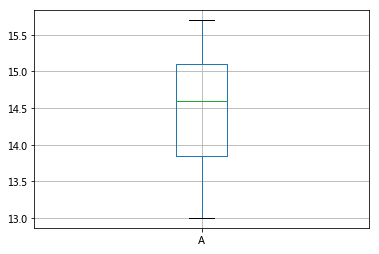

In [23]:
% matplotlib inline
import pandas as pd
import numpy as np


# 计算四分位
data =  [13, 13.5, 13.8, 13.9, 14, 14.6, 14.8, 15, 15.2, 15.4, 15.7]   #  [1, 1, 1, 1, 3, 5, 9]
# data = sorted(data)
print(data)
q1_pos = (len(data) + 1) * 0.25
q2_pos = (len(data) + 1) * 0.5
q3_pos = (len(data) + 1) * 0.75
print('下四分位：', q1_pos)
print('中位：', q2_pos)
print('上四分位：', q3_pos)

# 计算四分位数
q1_num = data[2] 
q2_num = data[5] 
q3_num = data[8] 
print('下四分位数：', q1_num)
print('中位数：', q2_num)
print('上四分位数：', q3_num)

df = pd.DataFrame(
    {
        'A': data
    }
)
ax = df.plot.box(grid=True)




4. 四分位数的计算规则（规则二：不整除整除的情况）
    - 假设数据样本是：` data = [1, 1, 9, 1, 3, 1, 1, 5]`，样本总数是$n=8$个。
    - 计算位置：
        - 上四分位：
            - $ =(n+1) * 75\% = 6.75 $
        - 中位：
            - $ =(n+1) * 50\% = 4.5 $
        - 下四分位：
            - $ =(n+1) * 25\% = 2.25 $
    - 确定四分位数，根据取这个小数两端的整数，作为位置，确定两个相邻的样本值，使用25%与75%作为权重系数，加权求和得到的就是四分位数。其中样本值的加权系数是25%，还是75%，按照离中心值得距离来决定，离中心值近的使用75%，离中心值远的使用25%。中位加权系数都是50%。
        - 上四分位数：
            - 取样本值：$data[7]与data[6]$，上四分位数$= 25\% *data[7] + 75\% * data[6]$ 
        - 中位数：
            - 取样本值：$data[5]与data[4]$，上四分位数$= 50\% *data[5] + 50\% * data[4]$ 
        - 下四分位数：
            - 取样本值：$data[3]与data[2]$，上四分位数$= 75\% *data[3] + 25\% * data[2]$ 

[1, 1, 1, 1, 1, 3, 5, 9]
下四分位： 2.25
中位： 4.5
上四分位： 6.75
下四分位数： 1.0
中位数： 1.0
上四分位数： 3.5


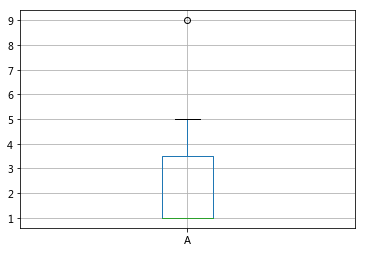

In [9]:
% matplotlib inline
import pandas as pd
import numpy as np


# 计算四分位
data = [1, 1, 3, 1, 9, 1, 5, 1]
data = sorted(data)
print(data)
q1_pos = (len(data) + 1) * 0.25
q2_pos = (len(data) + 1) * 0.5
q3_pos = (len(data) + 1) * 0.75
print('下四分位：', q1_pos)
print('中位：', q2_pos)
print('上四分位：', q3_pos)

# 计算四分位数
q1_num = data[1] *0.25 + data[2] * 0.75
q2_num = data[3] *0.5 + data[4] * 0.5  
q3_num = data[6] *0.25 + data[5] * 0.75 
print('下四分位数：', q1_num)
print('中位数：', q2_num)
print('上四分位数：', q3_num)

df = pd.DataFrame(
    {
        'A': data
    }
)
ax = df.plot.box(grid=True)



5. 上限与下限计算
    
    - 首先计算四分位矩 = 上四分位数 - 下四分位数  = Q3 -Q1 记为 IQR
    
    - 上限 = Q3 + 1.5 * IQR
    - 下限 = Q1 - 1.5 * IQR
    

[1, 1, 1, 1, 1, 3, 5, 9]
下四分位： 2.25
中位： 4.5
上四分位： 6.75
下四分位数： 1.0
中位数： 1.0
上四分位数： 3.5
上限： 7.25
下限： -2.75


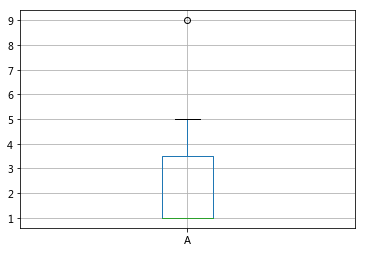

In [24]:
% matplotlib inline
import pandas as pd
import numpy as np


# 计算四分位
data = [1, 1, 3, 1, 9, 1, 5, 1]
data = sorted(data)
print(data)
q1_pos = (len(data) + 1) * 0.25
q2_pos = (len(data) + 1) * 0.5
q3_pos = (len(data) + 1) * 0.75
print('下四分位：', q1_pos)
print('中位：', q2_pos)
print('上四分位：', q3_pos)

# 计算四分位数
q1_num = data[1] *0.25 + data[2] * 0.75
q2_num = data[3] *0.5 + data[4] * 0.5  
q3_num = data[6] *0.25 + data[5] * 0.75 
print('下四分位数：', q1_num)
print('中位数：', q2_num)
print('上四分位数：', q3_num)

# 计算上限与下限

upper = q3_num + 1.5 * (q3_num - q1_num)
lower = q1_num - 1.5 * (q3_num - q1_num)

print('四分位矩：', q3_num - q1_num)
print('上限：', upper)
print('下限：', lower)

df = pd.DataFrame(
    {
        'A': data
    }
)
ax = df.plot.box(grid=True)




6. 异常值
    - 超过上下限的值位异常值。

7.75
3.25


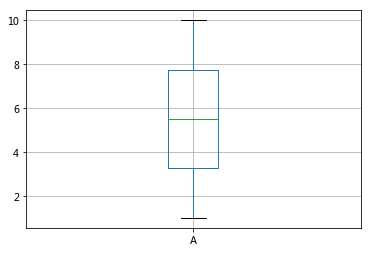

In [43]:
% matplotlib inline
import pandas as pd
import numpy as np


# 计算四分位
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,]

df = pd.DataFrame(
    {
        'A': data
    }
)
ax = df.plot.box(grid=True)


print(7*0.25 + 8 * 0.75)
print(3*0.75 + 4 * 0.25)

8.5
3.5


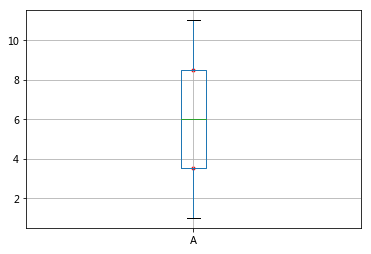

In [70]:
% matplotlib inline
import pandas as pd
import numpy as np


# 计算四分位
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

df = pd.DataFrame(
    {
        'A': data
    }
)
ax = df.plot.box(grid=True)
ax.scatter(x=[1], y=[8.5],s=9, c='r')
ax.scatter(x=[1], y=[3.5],s=9, c='r')
ax.set_xlim(0,2)

print(9*0.5 + 8 * 0.5)    # 刚好与两边相同
print(4*0.5 + 3 * 0.5)

9.25
3.75


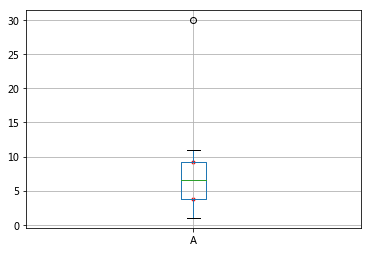

In [63]:
% matplotlib inline
import pandas as pd
import numpy as np


# 计算四分位
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 30]

df = pd.DataFrame(
    {
        'A': data
    }
)
ax = df.plot.box(grid=True)
ax.scatter(x=[1], y=[9.25],s=9, c='r')
ax.scatter(x=[1], y=[3.75],s=9, c='r')
ax.set_xlim(0,2)

print(9*0.75 + 10 * 0.25)
print(4*0.75 + 3 * 0.25)

#### density图

- 服从高斯分布的密度函数曲线。
    - 高斯分布的值取DataFrame的值

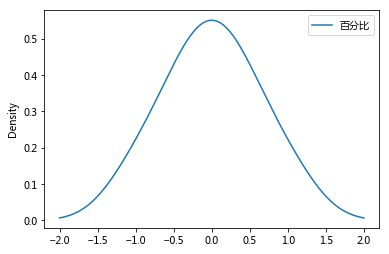

In [81]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
# df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
df['百分比'] = [-1, -0.5,-0.3,-0.1, 0.1, 0.3, 0.5, 1]

ax = df.plot.density(y='百分比')

#### hexbin图

job_listed
A轮      -1.0
B轮      -0.5
C轮      -0.3
D轮及以上   -0.1
不需要融资    0.1
天使轮      0.3
已上市      0.5
未融资      1.0
Name: 百分比, dtype: float64
job_listed
A轮       49
B轮       31
C轮       33
D轮及以上    41
不需要融资    47
天使轮      14
已上市      51
未融资      19
Name: job_company, dtype: int64


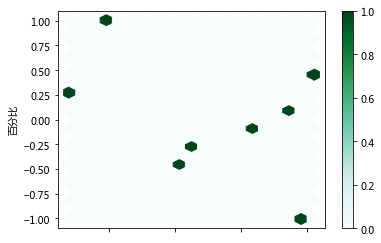

In [86]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
# df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
df['百分比'] = [-1, -0.5,-0.3,-0.1, 0.1, 0.3, 0.5, 1]
print(df['百分比'])

print(df['job_company'])
ax = df.plot.hexbin(x='job_company', y='百分比', gridsize=20)

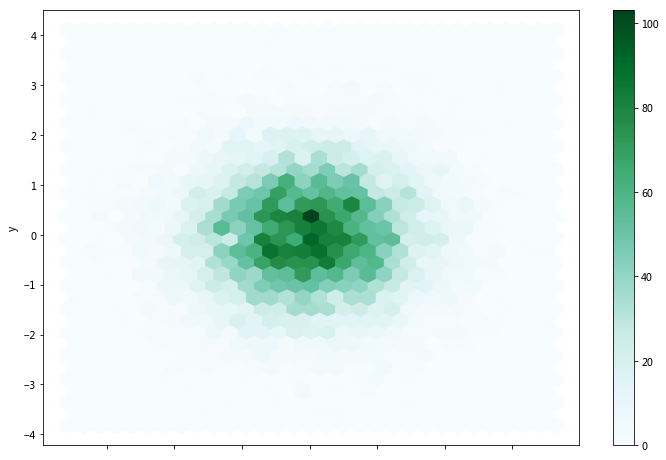

In [92]:
# 使用随机正态分布效果比较好（官方的例子）
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

n = 10000
df = pd.DataFrame(
    {
        'x': np.random.randn(n), 
        'y': np.random.randn(n)
    }
)
ax = df.plot.hexbin(x='x', y='y', gridsize=30, figsize=(12,8))

#### hist图

- 统计数据（）只能对数字分段)

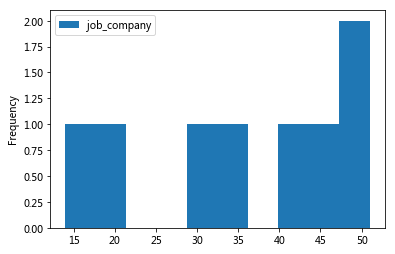

In [106]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])
gr = alg.groupby(['job_listed'])

df = gr.count()
ax = df.plot.hist(by='job_company', density=False)

#### kde图

- 使用高斯核生成核密度估计图

- 参数说明：
    - bw_method :可以指定标量带宽。使用较小的带宽值可能导致过拟合，而使用较大的带宽值可能会导致未匹配
    - ind指定一个下标索引，用来确定哪些点被密度估计。

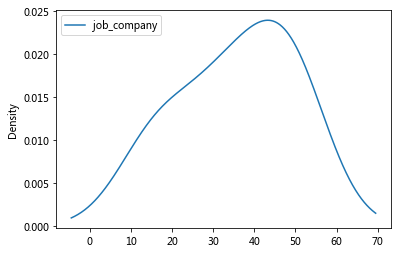

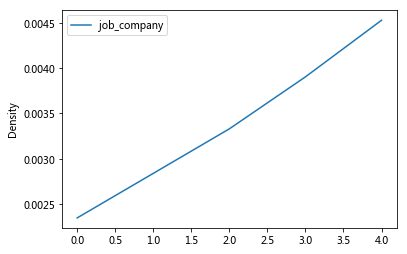

In [116]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])

gr = alg.groupby(['job_listed'])

df = gr.count()

# 使用索引添加一列
df['job_listed'] = df.index
# 添加一列数值
# df['百分比'] = [50, 40,80,60, 10, 20, 70, 30]
# df['百分比'] = [-1, -0.5,-0.3,-0.1, 0.1, 0.3, 0.5, 1]

ax = df.plot.kde(bw_method='scott')   
ax = df.plot.kde(ind=[0,2,3,4])      # 使用4个点做密度估计。

#### line图

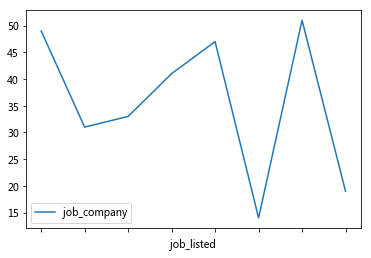

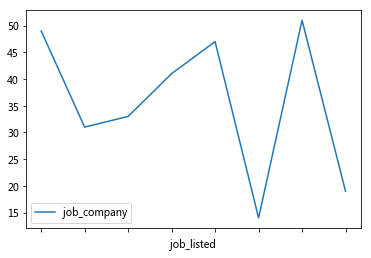

In [122]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])
gr = alg.groupby(['job_listed'])
df = gr.count()
# 使用索引添加一列
df['job_listed'] = df.index

ax = df.plot.line()   

ax = df.plot.line(x='job_listed', y='job_company' )   

#### scatter图

- 指定的x, y需要是数值型。

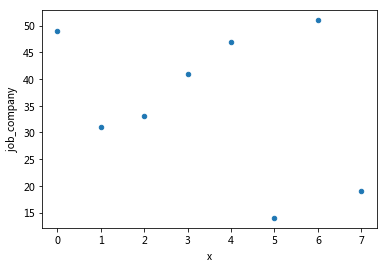

In [123]:

% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])
gr = alg.groupby(['job_listed'])
df = gr.count()
# 使用索引添加一列
df['x'] = [0,1,2,3,4,5,6,7]

ax = df.plot.scatter(x='x', y='job_company' )   


#### pie图

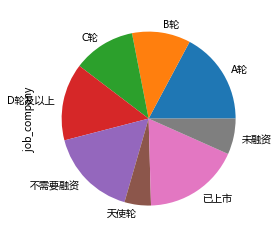

In [125]:

% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

alg = pd.read_csv('alg.csv', usecols=['job_company', 'job_listed'])
gr = alg.groupby(['job_listed'])
df = gr.count()
# 使用索引添加一列
df['x'] = [0,1,2,3,4,5,6,7]

ax = df.plot.pie(y='job_company' , legend=False)   

